<h1><center>TABLE OF CONTENT</center></h1>

1. IMPORTING LIBRARIES
    
2. LOADING DATASET
  
3. EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION
   
4. RESULT

### 1. IMPORTING NECCESARY LIBRARIES

In [372]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as ms
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')

### 2. LOADING DATASET  

In [373]:
df=pd.read_csv("supermarket.csv")

### 3. EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [374]:
# THE FIRST 5 RECORD OF THE DATA
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [375]:
# statistical Desciption of the Data
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [376]:
# Information about the Dataset i.e Column present, Datatype, Missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [377]:
# Numbers of Rows and Columns in the Dataset
df.shape

(1000, 17)

In [378]:
# Names of the Columns present
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [379]:
## Rename some column for easy reading
df.rename(columns={"Customer type": "Customer_type", "Product line": "Product_line",
                   "Unit price": "Unit_price", "Tax 5%": "Tax_5", "gross margin percentage": "gross_margin_percentage", 
                   "gross income": "gross_income"}, inplace="True")
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [380]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [381]:
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month_name()
df['year'] = (df['Date']).dt.year
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,January,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,March,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,March,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,January,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,February,2019


### Add a Sale Column by multiply the Unit_Price with the Quantity

In [382]:
df['Sales'] = df['Unit_price'] * df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5,Total,...,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,day,month,year,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,January,2019,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,8,March,2019,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,March,2019,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,January,2019,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,February,2019,604.17


In [383]:
# nan_df = df[df.isna().any(axis =1)]
# nan_df.head()
# for col in df.columns:
#     if df[col].dtype == 'O':
#         if df[col].str.contains(r'750-67-8428').any():
#             print('found in ' + col)

### 1. Which month was the most shopping done?

In [384]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [385]:
month_df = df.groupby(['month']).count()
month_df = month_df.reindex(month_order, axis=0).dropna(axis= 0)['Invoice ID']
month_df

month
January     352.0
February    303.0
March       345.0
Name: Invoice ID, dtype: float64

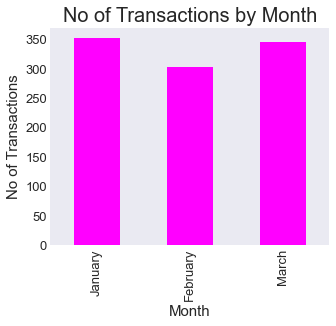

In [386]:
month_df.plot(kind= 'bar', figsize=[5,4],fontsize= 13, cmap= 'spring')
plt.title('No of Transactions by Month', fontsize= 20)
plt.xlabel('Month',fontsize= 15)
plt.ylabel('No of Transactions',fontsize = 15)
plt.show()

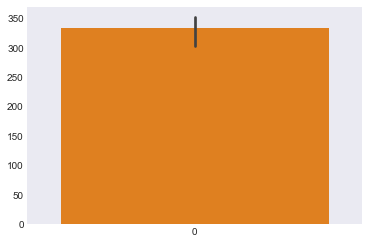

In [387]:
sns.barplot(data = month_df,palette="autumn")
plt.show()

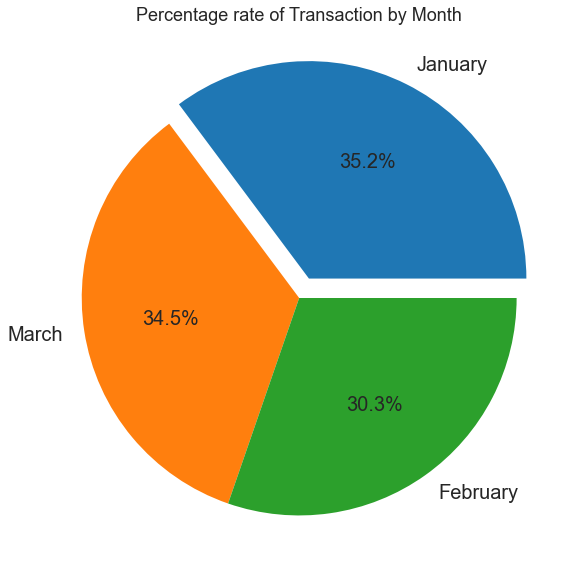

In [388]:
df.month.value_counts().plot(kind='pie', explode = [0.1,0,0] ,figsize = [10,10],autopct = '%.1f%%', fontsize= 20)
plt.title('Percentage rate of Transaction by Month', fontsize= 18)
plt.ylabel('')
plt.show()

### 2. Which City has the most Customers?

In [389]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

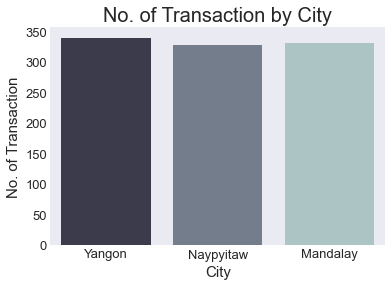

In [390]:
sns.countplot(x="City", data =df,palette="bone") 
plt.title('No. of Transaction by City', fontsize= 20)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.xlabel("City",fontsize = 15)
plt.ylabel("No. of Transaction",fontsize = 15)
plt.show()

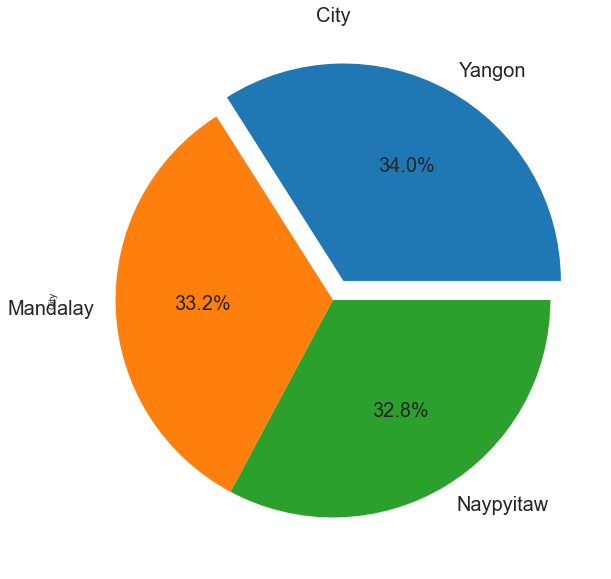

In [391]:
df.City.value_counts().plot(kind='pie', explode = [0.1,0,0] ,figsize = [10,10],autopct = '%.1f%%', fontsize= 20)
plt.title('City', fontsize= 20)
plt.show()

### 3. Which of the city made the most money from shopping.

In [392]:
Total_money = df.groupby(['City']).sum()['Total'].sort_values(ascending =False)
Total_money

City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64

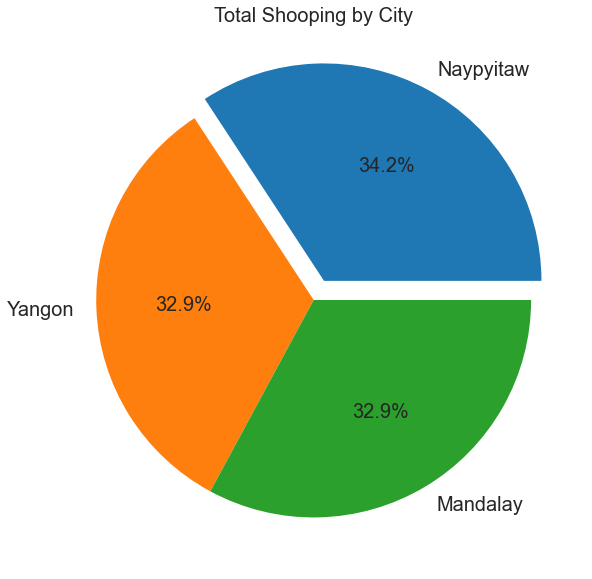

In [393]:
Total_money.plot(kind='pie', explode = [0.1,0,0] ,figsize = [10,10],autopct = '%.1f%%', fontsize= 20)
plt.title('Total Shooping by City', fontsize= 20)
plt.ylabel('')
plt.show()

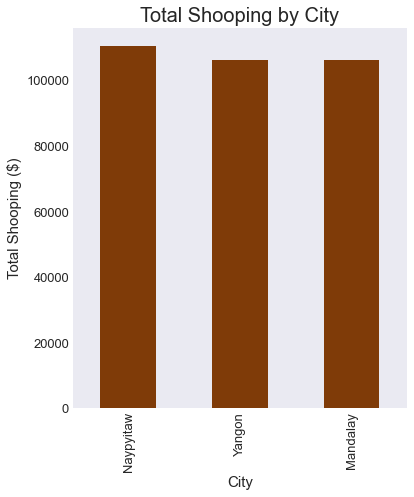

In [394]:
Total_money.plot(kind='bar',figsize = [6,7],fontsize= 13, cmap= 'PuOr')
plt.title('Total Shooping by City', fontsize= 20)
plt.xlabel('City',fontsize= 15)
plt.ylabel('Total Shooping ($)',fontsize = 15)
plt.show()

### 4. What is the Distribution of the Customer_type of the Supermarket

In [395]:
Customer_type =  df.Customer_type.value_counts()
Customer_type

Member    501
Normal    499
Name: Customer_type, dtype: int64

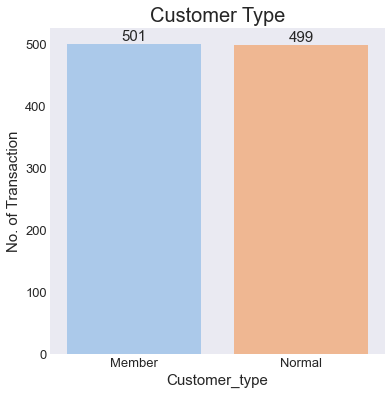

In [396]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x="Customer_type", data =df, palette= 'pastel')
plt.title('Customer Type', fontsize= 20)
ax.bar_label(ax.containers[0], fontsize = 15)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.xlabel("Customer_type",fontsize = 15)
plt.ylabel("No. of Transaction",fontsize = 15)
plt.show()

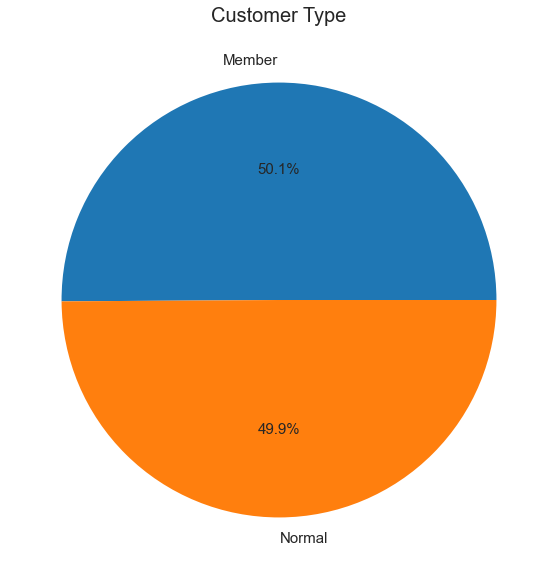

In [397]:
df.Customer_type.value_counts().plot(kind='pie' ,figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Customer Type', fontsize= 20)
plt.ylabel('')
plt.show()

### 5. What is the Gender Distribution of the Supermarket

In [398]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

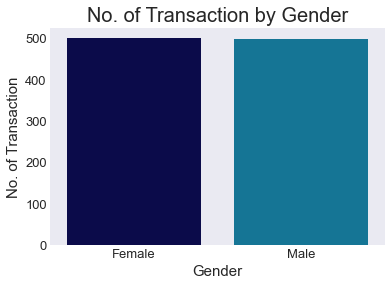

In [399]:
sns.countplot(x="Gender", data =df,palette="ocean").set_title("Gender")
plt.title('No. of Transaction by Gender', fontsize= 20)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)
plt.xlabel("Gender",fontsize = 15)
plt.ylabel("No. of Transaction",fontsize = 15)
plt.show()

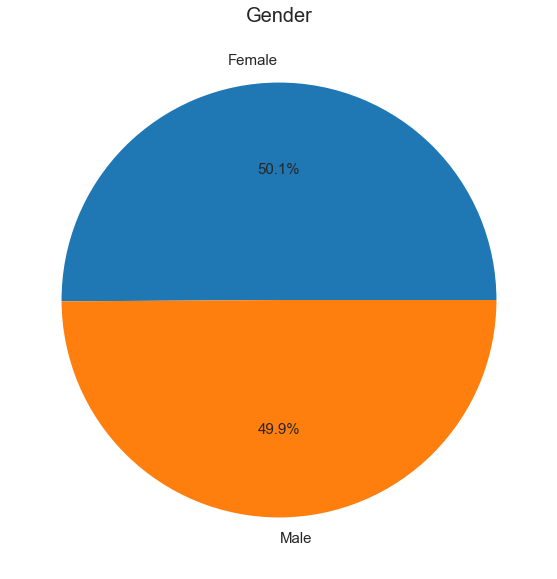

In [400]:
df.Gender.value_counts().plot(kind='pie' ,figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Gender', fontsize= 20)
plt.ylabel('')
plt.show()

### 6. Which Product has highest order? 

In [401]:
df.Product_line.value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_line, dtype: int64

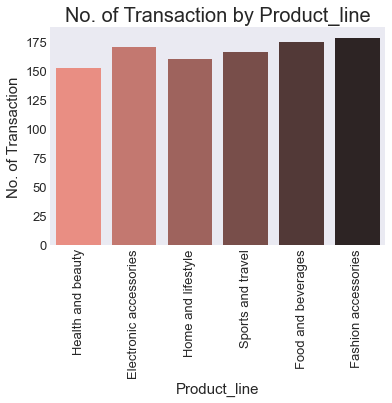

In [402]:
sns.countplot(x="Product_line", data =df,palette="dark:salmon_r") 
plt.title('No. of Transaction by Product_line', fontsize= 20)
plt.xticks(fontsize =13, rotation = 'vertical')
plt.yticks(fontsize =13)
plt.xlabel("Product_line",fontsize = 15)
plt.ylabel("No. of Transaction",fontsize = 15)
plt.show()

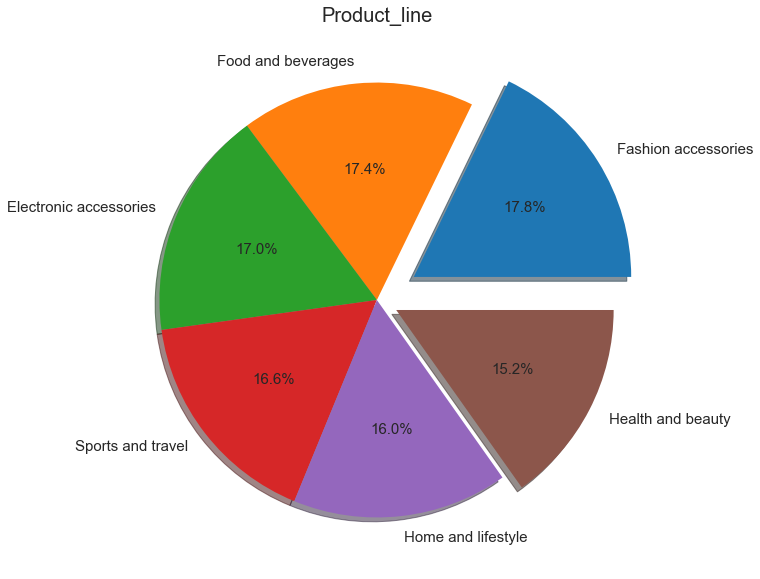

In [403]:
df.Product_line.value_counts().plot(kind='pie', shadow = True , explode = [0.2,0,0,0,0,0.1],figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Product_line', fontsize= 20)
plt.ylabel('')
plt.show()

### 7. Which product is most of the money is spent on?

In [404]:
Product_total = df.groupby(['Product_line']).sum()['Total'].sort_values(ascending=False)
Product_total

Product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

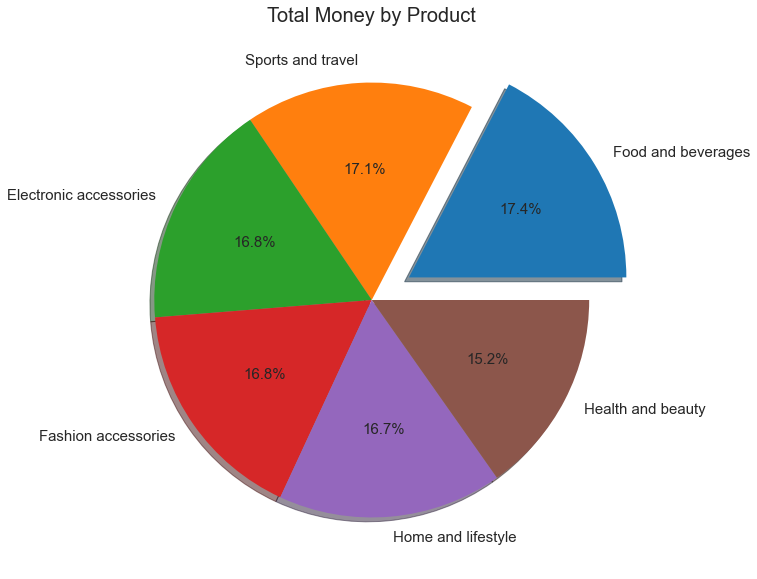

In [405]:
Product_total.plot(kind='pie', shadow = True , explode = [0.2,0,0,0,0,0],figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Total Money by Product', fontsize= 20)
plt.ylabel('')
plt.show()

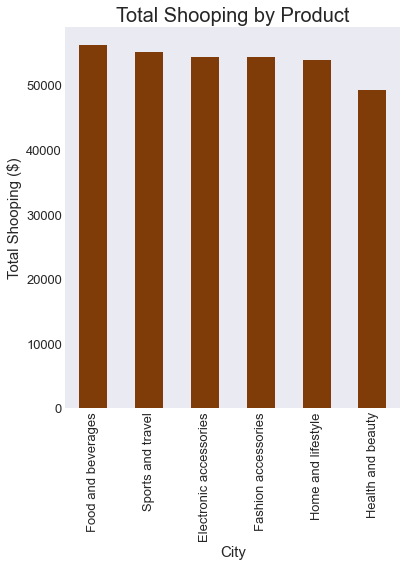

In [406]:
Product_total.plot(kind='bar',figsize = [6,7],fontsize= 13, cmap= 'PuOr')
plt.title('Total Shooping by Product', fontsize= 20)
plt.xticks(rotation = 'vertical')
plt.xlabel('City',fontsize= 15)
plt.ylabel('Total Shooping ($)',fontsize = 15)
plt.show()

### 8. Which of the Branches has highest order? 

In [407]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

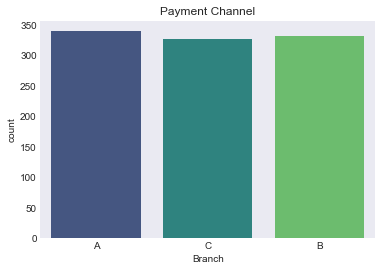

In [408]:
sns.countplot(x="Branch", data =df,palette="viridis").set_title("Payment Channel") 
plt.show()

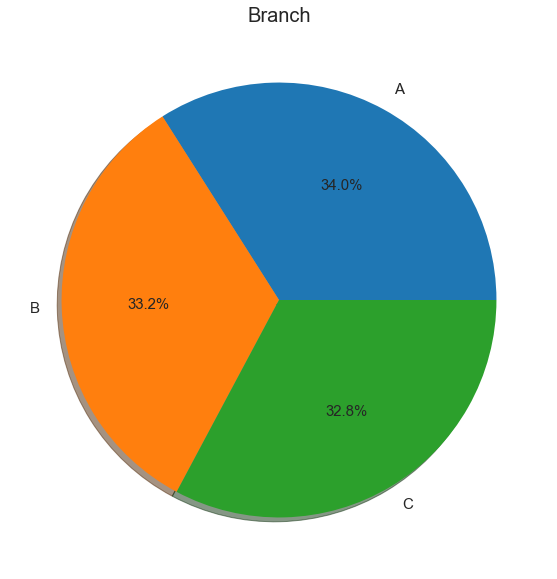

In [409]:
df.Branch.value_counts().plot(kind='pie', shadow = True ,figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Branch', fontsize= 20)
plt.ylabel('')
plt.show()

### 9. Which of the Branches has highest sales($)? 

In [410]:
Branch_total = df.groupby(['Branch']).sum()['Total'].sort_values(ascending=False)
Branch_total

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

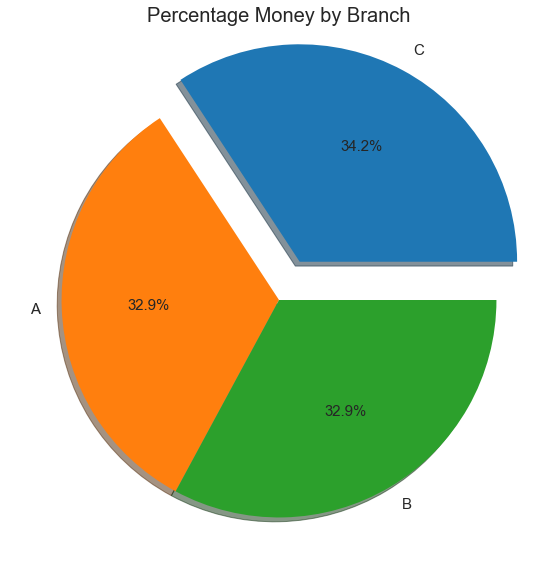

In [411]:
Branch_total.plot(kind='pie', shadow = True , explode = [0.2,0,0],figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Percentage Money by Branch', fontsize= 20)
plt.ylabel('')
plt.show()

### 10. Which Payment method is often use?

In [412]:
df.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

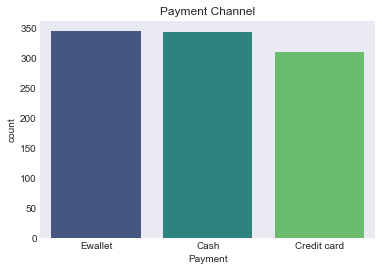

In [413]:
sns.countplot(x="Payment", data =df,palette="viridis").set_title("Payment Channel") 
plt.show()

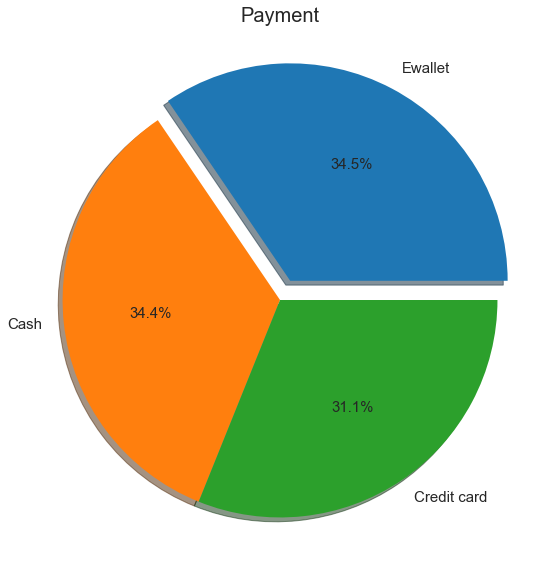

In [414]:
# fig = px.pie(df, values='Total', names='Payment')
# fig.show()
df.Payment.value_counts().plot(kind='pie', shadow = True ,explode = [0.1,0,0],figsize = [10,10],autopct = '%.1f%%', fontsize= 15)
plt.title('Payment', fontsize= 20)
plt.ylabel('')
plt.show()

### 11. For all Pruduct which gender spend the most?

In [415]:
product = df.groupby(['Product_line', 'Gender']).agg({'Total':'sum'})
product = product.reset_index()
product

,Product_line,Gender,Total
0,Electronic accessories,Female,27102.0225
1,Electronic accessories,Male,27235.5090
2,Fashion accessories,Female,30437.4000
3,Fashion accessories,Male,23868.4950
4,Food and beverages,Female,33170.9175
5,Food and beverages,Male,22973.9265
6,Health and beauty,Female,18560.9865
7,Health and beauty,Male,30632.7525
8,Home and lifestyle,Female,30036.8775
9,Home and lifestyle,Male,23825.0355


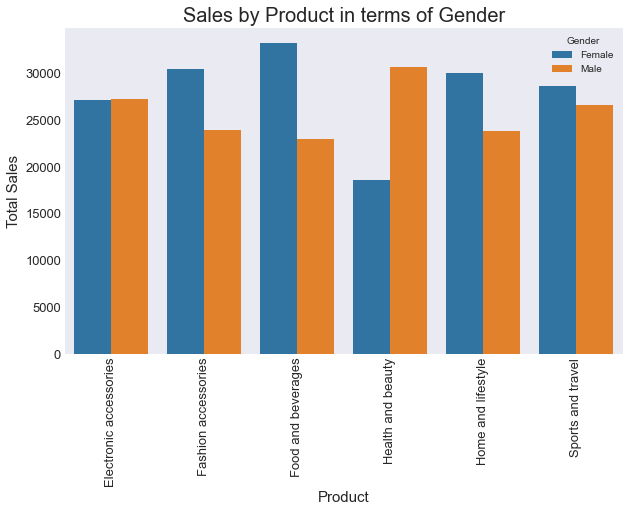

In [416]:
plt.figure(figsize = [10,6])
sns.barplot(x='Product_line',y='Total', hue= 'Gender', data= product)
plt.title('Sales by Product in terms of Gender',fontsize = 20)
plt.xlabel('Product',fontsize = 15)
plt.ylabel('Total Sales',fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xticks(rotation = 'vertical')
plt.show()